In [1]:
import json
import requests
import pandas as pd
#import nltk
#from nltk.probability import FreqDist

from matplotlib import pyplot as plt
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://data.montgomerycountymd.gov/resource/ecam-8hbr.json"


In [3]:
resp = requests.get(url)
resp

<Response [200]>

In [4]:
food = resp.json()
food

[{':@computed_region_d7bw_bq6x': '58',
  ':@computed_region_d9ke_fpxt': '1',
  ':@computed_region_kbsp_ykn9': '61',
  ':@computed_region_rbt8_3x7n': '1',
  ':@computed_region_tx5f_5em3': '3',
  'address1': '14615 BAUER DR.',
  'category': 'Public School- Middle',
  'city': 'ROCKVILLE',
  'establishment_id': '824',
  'inspectiondate': '2018-10-09T00:00:00.000',
  'inspectionresults': 'No Critical Violations Noted',
  'inspectiontype': 'Comprehensive',
  'latitude': '39.0936',
  'location': {'type': 'Point', 'coordinates': [-77.1076, 39.0936]},
  'longitude': '-77.1076',
  'name': 'EARLE B. WOOD MIDDLE',
  'organization': 'MONTGOMERY COUNTY PUBLIC SCHOOLS',
  'type': 'Food',
  'violation1': 'In Compliance',
  'violation2': 'In Compliance',
  'violation20': 'In Compliance',
  'violation22': 'In Compliance',
  'violation3': 'In Compliance',
  'violation4': 'In Compliance',
  'violation5': 'In Compliance',
  'violation6a': 'In Compliance',
  'violation6b': 'In Compliance',
  'violation7a': 

In [5]:
food[1]

{':@computed_region_d7bw_bq6x': '42',
 ':@computed_region_d9ke_fpxt': '1',
 ':@computed_region_kbsp_ykn9': '51',
 ':@computed_region_rbt8_3x7n': '1',
 ':@computed_region_tx5f_5em3': '2',
 'address1': '26043 RIDGE RD.',
 'category': 'Restaurant',
 'city': 'DAMASCUS',
 'establishment_id': '1488',
 'inspectiondate': '2018-09-27T00:00:00.000',
 'inspectionresults': 'No Critical Violations Noted',
 'inspectiontype': 'Monitoring',
 'latitude': '39.2849',
 'location': {'type': 'Point', 'coordinates': [-77.2074, 39.2849]},
 'longitude': '-77.2074',
 'name': 'LITTLE FAR EAST II',
 'organization': 'KING CUISINE CORP.',
 'type': 'Food',
 'violation1': 'In Compliance',
 'violation2': 'In Compliance',
 'violation20': 'In Compliance',
 'violation22': 'In Compliance',
 'violation3': 'In Compliance',
 'violation4': 'In Compliance',
 'violation5': 'In Compliance',
 'violation6a': 'In Compliance',
 'violation6b': 'In Compliance',
 'violation7a': 'In Compliance',
 'violation7b': 'In Compliance',
 'violat

In [6]:
addlst = []
catlst = []
citylst = []
insp_date = []
insp_result = []
insp_type = []
lat = []
long = []
loco = []
#name = []
zip_lst = []
vimenu = []
vismoke = []
vifat = []

In [7]:
for rest in food:
    try:
        restcategory  = rest['category']
    except:
        restcategory = None
    catlst.append(restcategory)
    try:
        sty = rest['city']
    except:
        sty = None 
    citylst.append(sty)
    
    try:
        restype = rest['inspectiontype']
    except:
        restype = None
    insp_type.append(restype)
    
    addlst.append(rest['address1'])
    insp_date.append(rest['inspectiondate'])
    insp_result.append(rest['inspectionresults'])
    lat.append(rest['latitude'])
    loco.append(rest['location'])
    long.append(rest['longitude'])
    #name.append(rest['name'])
      
    vimenu.append(rest['violationmenu'])
    vismoke.append(rest['violationsmoking'])
    vifat.append(rest['violationtransfat'])
    zip_lst.append(rest['zip'])     
        

In [8]:
print(len(addlst))
print(len(catlst))
print(len(citylst))
print(len(insp_date))
print(len(insp_result))
print(len(insp_type))
print(len(lat))
print(len(long))
print(len(loco))


1000
1000
1000
1000
1000
1000
1000
1000
1000


In [9]:
len(catlst)

1000

In [10]:
colnames = {'Address':addlst,
            'Category':catlst, 
            'City':citylst,
            'Inspection_date':insp_date,
            'Inspection_result':insp_result,
            'Inpsection_type': insp_type,
            'Latitude':lat,
            'Longitude':long,
            'location' : loco,
            'Zip':zip_lst          
           }

In [11]:
df = pd.DataFrame(data = colnames)
df

,Address,Category,City,Inspection_date,Inspection_result,Inpsection_type,Latitude,Longitude,location,Zip
0,14615 BAUER DR.,Public School- Middle,ROCKVILLE,2018-10-09T00:00:00.000,No Critical Violations Noted,Comprehensive,39.0936,-77.1076,"{'type': 'Point', 'coordinates': [-77.1076, 39...",20853
1,26043 RIDGE RD.,Restaurant,DAMASCUS,2018-09-27T00:00:00.000,No Critical Violations Noted,Monitoring,39.2849,-77.2074,"{'type': 'Point', 'coordinates': [-77.2074, 39...",20872
2,2900 OLNEY SANDY SPRING ROAD,Restaurant,OLNEY,2018-10-10T00:00:00.000,No Critical Violations Noted,Comprehensive,39.1492,-77.0602,"{'type': 'Point', 'coordinates': [-77.0602, 39...",20832
3,3233 SPARTAN RD,Carry Out,OLNEY,2018-10-10T00:00:00.000,No Critical Violations Noted,Comprehensive,39.1505,-77.0631,"{'type': 'Point', 'coordinates': [-77.0631, 39...",20832
4,"2900 UNIVERSITY BLVD., W.",Market,WHEATON,2018-10-11T00:00:00.000,No Critical Violations Noted,Comprehensive,39.0374,-77.0584,"{'type': 'Point', 'coordinates': [-77.0584, 39...",20895
5,5000 BRADLEY BLVD,Market,CHEVY CHASE,2018-09-10T00:00:00.000,No Critical Violations Noted,Food Complaint,38.9774,-77.0991,"{'type': 'Point', 'coordinates': [-77.0991, 38...",20815
6,13701 CONNECTICUT AVE.,Restaurant,WHEATON,2018-09-10T00:00:00.000,No Critical Violations Noted,Fire Call,39.0787,-77.0802,"{'type': 'Point', 'coordinates': [-77.0802, 39...",20906
7,1355 HOLTON LN,Market,TAKOMA PARK,2018-09-10T00:00:00.000,No Critical Violations Noted,Comprehensive,38.9854,-76.9858,"{'type': 'Point', 'coordinates': [-76.9858, 38...",20912
8,505 QUINCE ORCHARD RD.,Restaurant,GAITHERSBURG,2018-09-10T00:00:00.000,No Critical Violations Noted,Comprehensive,39.1445,-77.2197,"{'type': 'Point', 'coordinates': [-77.2197, 39...",20878
9,12611 F WISTERIA DR.,Market,GERMANTOWN,2018-09-10T00:00:00.000,No Critical Violations Noted,Comprehensive,39.1706,-77.2609,"{'type': 'Point', 'coordinates': [-77.2609, 39...",20874


In [12]:
df.groupby('Inspection_result').count()

,Address,Category,City,Inspection_date,Inpsection_type,Latitude,Longitude,location,Zip
Inspection_result,,,,,,,,,
Critical Violations Corrected,359,341,359,359,359,359,359,359,359
Facility Closed,12,12,12,12,12,12,12,12,12
No Critical Violations Noted,629,588,629,629,618,629,629,629,629


In [13]:
#drop rows with any missing data
df1 = df.dropna()
df1["Category"].value_counts().sum()

931

In [14]:
df_add=df1.set_index('Address')
df_add.shape

(931, 9)

In [15]:
import pandas as pd

In [18]:
df.groupby('City').Inspection_date.count()

City
ASHTON                  4
BETHESDA              126
BOYDS                   1
BROOKEVILLE             1
BURTONSVILLE           14
CABIN JOHN              2
CHEVY CHASE            12
CLARKSBURG             20
DAMASCUS                3
DARNESTOWN              1
DERWOOD                 4
GAITHERSBURG          228
GERMANTOWN             52
KENSINGTON             18
LANGLEY PARK            1
LAYTONSVILLE            1
MONTGOMERY VILLAGE      2
N. BETHESDA             1
OLNEY                  32
POOLESVILLE             9
POTOMAC                25
ROCKVILLE             177
SANDY SPRING            3
SILVER SPRING         199
SIVER SPRING            1
SPENCERVILLE            1
TAKOMA PARK            42
WHEATON                20
Name: Inspection_date, dtype: int64

In [ ]:
df.to_excel('FoodIsGood.xlsx')

In [19]:
df.groupby('Zip').count()

,Address,Category,City,Inspection_date,Inspection_result,Inpsection_type,Latitude,Longitude,location
Zip,,,,,,,,,
20783,2,2,2,2,2,2,2,2,2
20814,87,85,87,87,87,86,87,87,87
20815,12,12,12,12,12,12,12,12,12
20816,10,9,10,10,10,10,10,10,10
20817,27,24,27,27,27,27,27,27,27
20818,2,2,2,2,2,2,2,2,2
20832,31,31,31,31,31,31,31,31,31
20833,1,1,1,1,1,1,1,1,1
20837,9,9,9,9,9,9,9,9,9


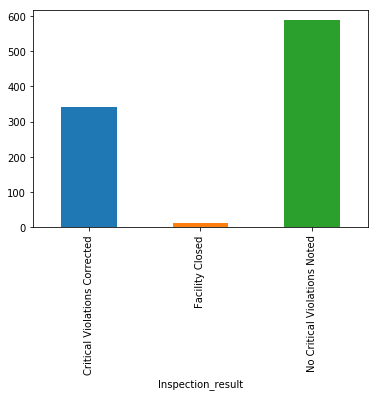

In [21]:
df.groupby('Inspection_result').count()['Category'].plot(kind='bar')

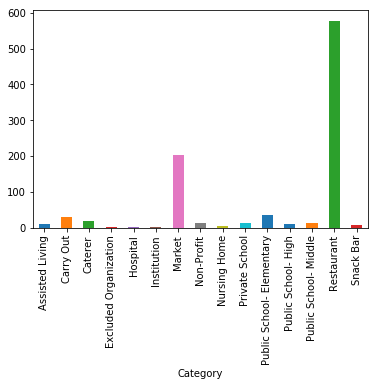

In [22]:
df.groupby('Category').count()['Zip'].plot(kind='bar')

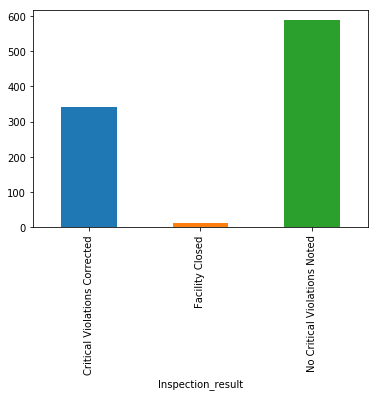

In [23]:
df.groupby('Inspection_result').count()['Category'].plot(kind='bar')

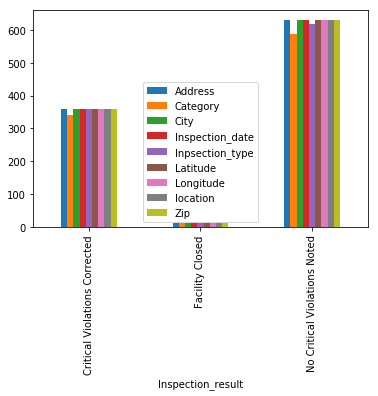

In [24]:
df.groupby('Inspection_result').count().plot(kind='bar')

In [25]:
df.groupby('Inspection_result').Category.count()

Inspection_result
Critical Violations Corrected    341
Facility Closed                   12
No Critical Violations Noted     588
Name: Category, dtype: int64

In [26]:
df['Inspection_result'].value_counts()

No Critical Violations Noted     629
Critical Violations Corrected    359
Facility Closed                   12
Name: Inspection_result, dtype: int64

In [27]:
df.Inspection_result.value_counts()

No Critical Violations Noted     629
Critical Violations Corrected    359
Facility Closed                   12
Name: Inspection_result, dtype: int64

In [28]:
from datetime import datetime as dt

In [29]:
df_new = df[["Address",'Category','City','Zip','Inspection_date','Inspection_result','Inpsection_type','Latitude','Longitude','location']]
df_new['Datetime'] = pd.to_datetime(df_new['Inspection_date'])
df_new["Year"] = df_new["Datetime"].dt.year
df_new['Month'] = df_new['Datetime'].dt.strftime("%B")
df_new["Date"] = df_new["Datetime"].dt.date
df_new['Day']= df_new['Datetime'].dt.strftime("%A")
df_new["Week"]= df_new['Datetime'].dt.week
df_new
#df.date_time.map(lambda x: x.strftime('%Y-%m-%d'))
#datetime_obj = datetime.datetime.strptime(date_str, format_str)

C:\Users\azme7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\azme7\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\azme7\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Address,Category,City,Zip,Inspection_date,Inspection_result,Inpsection_type,Latitude,Longitude,location,Datetime,Year,Month,Date,Day,Week
0,14615 BAUER DR.,Public School- Middle,ROCKVILLE,20853,2018-10-09T00:00:00.000,No Critical Violations Noted,Comprehensive,39.0936,-77.1076,"{'type': 'Point', 'coordinates': [-77.1076, 39...",2018-10-09,2018,October,2018-10-09,Tuesday,41
1,26043 RIDGE RD.,Restaurant,DAMASCUS,20872,2018-09-27T00:00:00.000,No Critical Violations Noted,Monitoring,39.2849,-77.2074,"{'type': 'Point', 'coordinates': [-77.2074, 39...",2018-09-27,2018,September,2018-09-27,Thursday,39
2,2900 OLNEY SANDY SPRING ROAD,Restaurant,OLNEY,20832,2018-10-10T00:00:00.000,No Critical Violations Noted,Comprehensive,39.1492,-77.0602,"{'type': 'Point', 'coordinates': [-77.0602, 39...",2018-10-10,2018,October,2018-10-10,Wednesday,41
3,3233 SPARTAN RD,Carry Out,OLNEY,20832,2018-10-10T00:00:00.000,No Critical Violations Noted,Comprehensive,39.1505,-77.0631,"{'type': 'Point', 'coordinates': [-77.0631, 39...",2018-10-10,2018,October,2018-10-10,Wednesday,41
4,"2900 UNIVERSITY BLVD., W.",Market,WHEATON,20895,2018-10-11T00:00:00.000,No Critical Violations Noted,Comprehensive,39.0374,-77.0584,"{'type': 'Point', 'coordinates': [-77.0584, 39...",2018-10-11,2018,October,2018-10-11,Thursday,41
5,5000 BRADLEY BLVD,Market,CHEVY CHASE,20815,2018-09-10T00:00:00.000,No Critical Violations Noted,Food Complaint,38.9774,-77.0991,"{'type': 'Point', 'coordinates': [-77.0991, 38...",2018-09-10,2018,September,2018-09-10,Monday,37
6,13701 CONNECTICUT AVE.,Restaurant,WHEATON,20906,2018-09-10T00:00:00.000,No Critical Violations Noted,Fire Call,39.0787,-77.0802,"{'type': 'Point', 'coordinates': [-77.0802, 39...",2018-09-10,2018,September,2018-09-10,Monday,37
7,1355 HOLTON LN,Market,TAKOMA PARK,20912,2018-09-10T00:00:00.000,No Critical Violations Noted,Comprehensive,38.9854,-76.9858,"{'type': 'Point', 'coordinates': [-76.9858, 38...",2018-09-10,2018,September,2018-09-10,Monday,37
8,505 QUINCE ORCHARD RD.,Restaurant,GAITHERSBURG,20878,2018-09-10T00:00:00.000,No Critical Violations Noted,Comprehensive,39.1445,-77.2197,"{'type': 'Point', 'coordinates': [-77.2197, 39...",2018-09-10,2018,September,2018-09-10,Monday,37
9,12611 F WISTERIA DR.,Market,GERMANTOWN,20874,2018-09-10T00:00:00.000,No Critical Violations Noted,Comprehensive,39.1706,-77.2609,"{'type': 'Point', 'coordinates': [-77.2609, 39...",2018-09-10,2018,September,2018-09-10,Monday,37


In [ ]:
#dff = df_new.dropna()
#dff

In [30]:
df_new['Category'].value_counts()

Restaurant                   578
Market                       202
Public School- Elementary     36
Carry Out                     30
Caterer                       20
Public School- Middle         13
Private School                13
Non-Profit                    12
Assisted Living               11
Public School- High            9
Snack Bar                      8
Nursing Home                   5
Institution                    2
Hospital                       1
Excluded Organization          1
Name: Category, dtype: int64

In [33]:
df_new.groupby('Zip').City.value_counts()
#df_new.groupby('Name').Category.value_counts()

Zip    City              
20783  LANGLEY PARK           1
       TAKOMA PARK            1
20814  BETHESDA              87
20815  CHEVY CHASE           12
20816  BETHESDA              10
20817  BETHESDA              27
20818  CABIN JOHN             2
20832  OLNEY                 31
20833  BROOKEVILLE            1
20837  POOLESVILLE            9
20841  BOYDS                  1
20850  ROCKVILLE             90
20851  ROCKVILLE             21
20852  ROCKVILLE             37
       BETHESDA               2
       N. BETHESDA            1
20853  ROCKVILLE             18
20854  POTOMAC               23
       ROCKVILLE              7
20855  DERWOOD                4
       ROCKVILLE              4
20860  SANDY SPRING           3
       OLNEY                  1
20861  ASHTON                 4
20866  BURTONSVILLE          14
20868  SPENCERVILLE           1
20871  CLARKSBURG            20
20872  DAMASCUS               3
20874  GERMANTOWN            41
       DARNESTOWN             1
20876  GERMANT

In [34]:
#dff.to_excel('MocoFoodIn.xlsx')

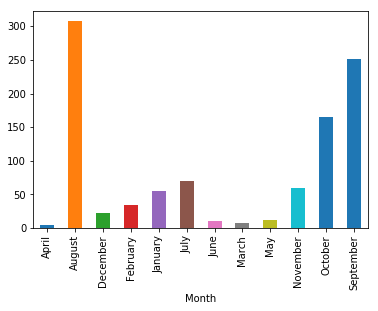

In [35]:
#df.groupby('Address').count()
df_new.groupby('Month').count()['Inspection_date'].plot(kind='bar')

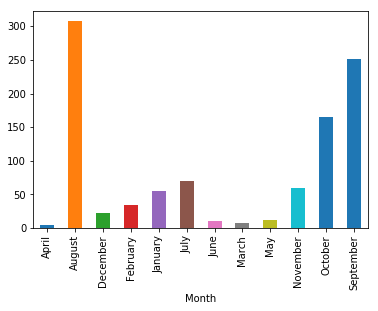

In [36]:
df_new.groupby('Month').count()['Inspection_date'].plot(kind='bar')

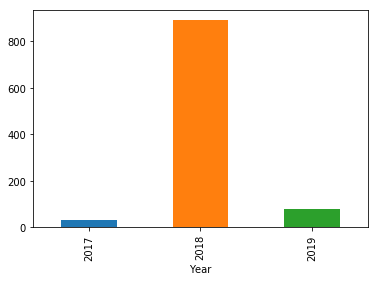

In [37]:
df_new.groupby('Year').count()['Inspection_date'].plot(kind='bar')

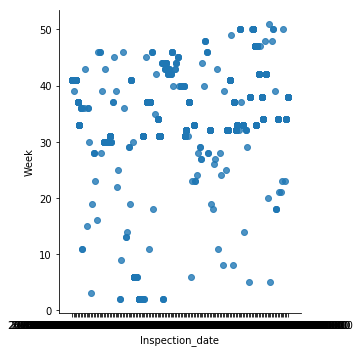

In [38]:
#add more details to scatterplot
sns.lmplot(x='Inspection_date', y='Week', data=df_new, 
           fit_reg=False) #remove regression line
           #hue='Stage')   #color by evolution stage

In [39]:
df['Inpsection_type'].value_counts()

Comprehensive                           426
Monitoring                              340
Reinspection                             47
Pre-Opening - Environmental              32
Environmental                            27
Monitoring w/Complaint Investigation     27
Food Complaint                           27
Complaint Invest w/Comprehensive         13
Change of Ownership - Environmental      12
Re-inspection Billable                    9
Other                                     8
Plans Approved                            8
Visit/No Action                           6
Fire Call                                 5
Routine                                   1
Consultation                              1
Name: Inpsection_type, dtype: int64

C:\Users\azme7\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


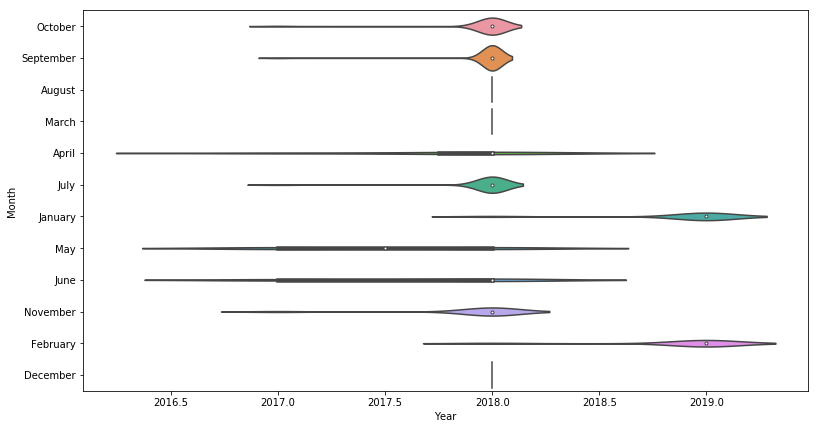

In [40]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='Year', y='Month', data=df_new)

In [41]:
df_new.to_excel('MocoFood.xlsx')

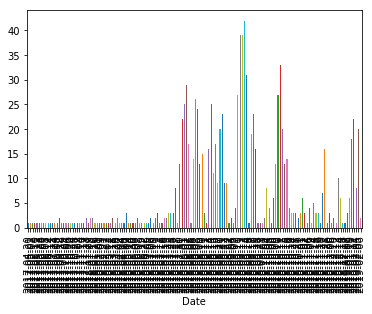

In [42]:
df_new.groupby('Date').count()['Inspection_date'].plot(kind='bar')

In [ ]:
df['Zip'].unique()

In [ ]:
vi1 = []
vi2 = []
vi3 = []
vi4 =[]
vi5 = []
vi6a = []
vi6b = []
vi7a = []
vi7b = []
vi8 = []
vi9 = []
vi20 = []
vi22 = []
vimenu = []
vismoke = []
vifat = []

In [ ]:
for ding in food:
    vi1.append(ding['violation1'])
    vi2.append(ding['violation2'])
    vi20.append(ding['violation20'])
    vi22.append(ding['violation22'])
    vi3.append(ding['violation3'])
    vi4.append(ding['violation4'])
    vi5.append(ding['violation5'])
    vi6a.append(ding['violation6a'])
    vi6b.append(ding['violation6b'])
    vi7a.append(ding['violation7a'])
    vi7b.append(ding['violation7b'])
    vi8.append(ding['violation8'])
    vi9.append(ding['violation9'])
    vimenu.append(ding['violationmenu'])
    vismoke.append(ding['violationsmoking'])
    vifat.append(ding['violationtransfat'])

In [ ]:
print(len(vi1))
print(len(vi2))
print(len(vi3))
print(len(vi4))
print(len(vi5))
print(len(vi6a))
print(len(vi6b))
print(len(vi7a))
print(len(vi7b))
print(len(vi8))
print(len(vi9))
print(len(vi20))
print(len(vi22))
print(len(vimenu))
print(len(vismoke))
print(len(vifat))

In [ ]:
newcolumn = {'Violation1':vi1,
             'Violation2':vi2,
             'Violation3':vi3,
             'Violation4':vi4,
             'Violation5':vi5,
             'Violation6a':vi6a,
             'Violation6b':vi6b,
             'Violation7a':vi7a,
             'Violation7b':vi7b,
             'Violation8':vi8,
             'Violation9':vi9,
             'Violation20':vi20,
             'Violation22':vi22,
             'Violationmenu':vimenu,
             'Violationsmoke':vismoke,
             'Violationtransfat':vifat
            }

In [ ]:
df_violation = pd.DataFrame(data=newcolumn)
df_violation.head()

In [ ]:
df_violation['Violationtransfat'].unique()

In [ ]:
df_violation['Violationtransfat'].value_counts()

In [ ]:
df_violation.groupby('Violationtransfat').Violationmenu.count()

In [ ]:
df_violation['Violationsmoke'].value_counts()

In [ ]:
df_violation['Violationmenu'].value_counts()

In [ ]:
df_violation.groupby('Violationsmoke').Violationmenu.count()

In [ ]:
df_violation.groupby('Violationsmoke').count()['Violationmenu'].plot(kind='bar')
#df_violation.groupby('Violationsmoke').count()['Inspection_result'].plot(kind='bar')

In [ ]:
#df2 = pd.concat([])
ddg =pd.concat([df_new,df_violation], axis=1)
ddg

In [ ]:

df_violation.to_excel('MocoFi.xlsx')